<a href="https://colab.research.google.com/github/simonskyjumpp/stockanalysis/blob/main/s%26p500_2010to2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('SnP_daily_update.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'SnP_daily_update.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SnP_daily_update.csv to SnP_daily_update.csv


In [ ]:
df = pd.read_csv('SnP_daily_update.csv', delimiter=';')

In [ ]:
print(df.columns)

Index(['Date', 'A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE',
       'ADI',
       ...
       'WTW2004', 'WY2005', 'WYNN2006', 'XEL2007', 'XOM2008', 'XYL2009',
       'YUM2010', 'ZBH2011', 'ZBRA2012', 'ZTS2013'],
      dtype='object', length=2516)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-20-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3828 entries, 2010-01-04 to 2025-03-21
Columns: 2515 entries, A to ZTS2013
dtypes: float64(2084), int64(431)
memory usage: 73.5 MB
None


In [ ]:
print(df.head())

                    A      AAPL  ABBV  ABNB        ABT      ACGL        ACN  \
Date                                                                          
2010-01-04  20.016031  6.440330   NaN   NaN  18.665764  7.601905  31.941799   
2010-01-05  19.798601  6.451466   NaN   NaN  18.514956  7.576549  32.139198   
2010-01-06  19.728264  6.348846   NaN   NaN  18.617781  7.543795  32.480858   
2010-01-07  19.702684  6.337111   NaN   NaN  18.772011  7.499420  32.450500   
2010-01-08  19.696287  6.379240   NaN   NaN  18.867979  7.484628  32.321419   

                 ADBE        ADI        ADM  ...  WTW2004   WY2005  WYNN2006  \
Date                                         ...                               
2010-01-04  37.090000  22.162523  21.004900  ...   348017  1832400   4741400   
2010-01-05  37.700001  22.127539  21.118380  ...   339523  1724500   5644300   
2010-01-06  37.619999  22.085546  21.064978  ...   585049  2254400   2738800   
2010-01-07  36.889999  21.910597  20.844713  .

In [ ]:
print(df.shape[0])

3828


In [ ]:
last_5_lines = df.tail(5)

In [ ]:
print(last_5_lines)

                     A        AAPL        ABBV        ABNB         ABT  \
Date                                                                     
2025-03-17  122.489998  214.000000  214.470001  126.940002  127.639999   
2025-03-18  123.099998  212.690002  213.850006  124.559998  126.300003   
2025-03-19  122.209999  215.240005  212.250000  126.000000  127.419998   
2025-03-20  120.279999  214.100006  211.960007  126.150002  126.779999   
2025-03-21  120.750000  218.270004  210.009995  128.800003  126.339996   

                 ACGL         ACN        ADBE         ADI        ADM  ...  \
Date                                                                  ...   
2025-03-17  95.279999  325.709991  399.339996  211.679993  47.990002  ...   
2025-03-18  93.300003  324.070007  391.369995  209.160004  47.680000  ...   
2025-03-19  93.190002  324.470001  387.890015  209.970001  46.930000  ...   
2025-03-20  92.449997  300.910004  389.609985  205.899994  46.520000  ...   
2025-03-21  91.9800

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
import yfinance as yf

In [ ]:
ticker = 'AAPL'

In [ ]:
for i in range(1, 6):
    df[f'{ticker}_lag_{i}'] = df[ticker].shift(i)

<ipython-input-20-019a38a0b279>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{ticker}_lag_{i}'] = df[ticker].shift(i)
<ipython-input-20-019a38a0b279>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{ticker}_lag_{i}'] = df[ticker].shift(i)
<ipython-input-20-019a38a0b279>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df[[f'{ticker}_lag_{i}' for i in range(1, 6)]]
y = df[ticker]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for {ticker}: {mse:.4f}')

Mean Squared Error for AAPL: 16.8509


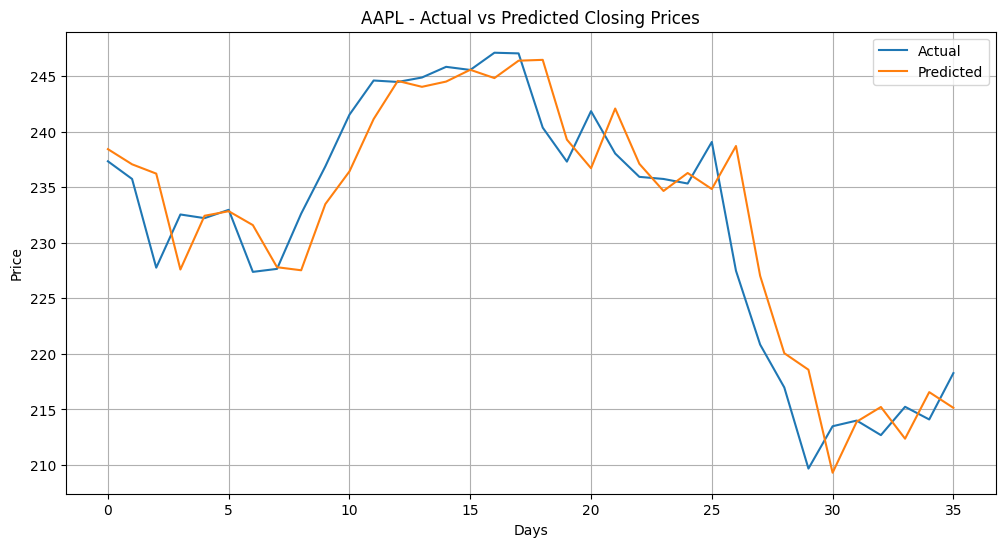

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(f'{ticker} - Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

In [ ]:
comparison_df.reset_index(drop=True, inplace=True)

In [ ]:
print(comparison_df.head(10))

       Actual   Predicted
0  237.329056  238.423448
1  235.740814  237.058886
2  227.759583  236.221592
3  232.544327  227.594059
4  232.214691  232.428524
5  232.963867  232.838629
6  227.380005  231.588785
7  227.649994  227.799714
8  232.619995  227.524649
9  236.869995  233.478806


In [ ]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
dates_test = df.index[train_size:]

In [ ]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}, index=dates_test)

comparison_df.index.name = 'Date'

In [ ]:
print(comparison_df.head(10))

                Actual   Predicted
Date                              
2025-01-30  237.329056  238.423448
2025-01-31  235.740814  237.058886
2025-02-03  227.759583  236.221592
2025-02-04  232.544327  227.594059
2025-02-05  232.214691  232.428524
2025-02-06  232.963867  232.838629
2025-02-07  227.380005  231.588785
2025-02-10  227.649994  227.799714
2025-02-11  232.619995  227.524649
2025-02-12  236.869995  233.478806


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.fit(X_train, y_train).predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf:.4f}')

Mean Squared Error (Random Forest): 22.9453


In [ ]:
pip install transformers datasets scikit-learn pandas matplotlib

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.txt to train_data.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
!ls /content/

'PqWOtG6VTYmfUoVjdMomeg_e87fc87348e24ca39bc818731cbd78a1_gLw0tZwJQZetCUQuARyHBA_bb1ebc2c2e9c4b4ba25acb126ad893a1_train_data (1).txt'
 sample_data
 train_data.txt


In [ ]:
with open("/content/train_data.txt", "r", encoding="utf-8") as file:
    data = file.read()

In [ ]:
print(data[:500])

0	In the beginning God created the heavens and the earth. Now the earth was formless and empty, darkness was over the surface of the deep, and the Spirit of God was hovering over the waters.
1	And God said, Let there be light, and there was light. God saw that the light was good, and he separated the light from the darkness. God called the light day, and the darkness he called night. And there was evening, and there was morning—the first day.
1	And God said, Let there be a vault between the wate


In [ ]:
file_path = "/content/train_data.txt"
train_df = pd.read_csv("/content/train_data.txt", sep="\t")

In [ ]:
print(train_df.columns)

Index(['0', 'In the beginning God created the heavens and the earth. Now the earth was formless and empty, darkness was over the surface of the deep, and the Spirit of God was hovering over the waters.'], dtype='object')


In [ ]:
if 'Phrase' not in train_df.columns or 'Sentiment' not in train_df.columns:
    raise ValueError("Dataset does not contain the required columns: 'Phrase' and 'Sentiment'")

ValueError: Dataset does not contain the required columns: 'Phrase' and 'Sentiment'

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
train_df['Predicted_Sentiment'] = train_df['Phrase'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

KeyError: 'Phrase'

In [ ]:
train_df.columns.values[1] = "Phrase"

In [ ]:
print(train_df.shape)

(30458, 2)


In [ ]:
train_df.columns = ['Sentiment', 'Phrase']

In [ ]:
train_df['Predicted_Sentiment'] = train_df['Phrase'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

In [ ]:
label_mapping = {"POSITIVE": 1, "NEGATIVE": 0}
train_df['Predicted_Sentiment'] = train_df['Predicted_Sentiment'].map(label_mapping)

In [ ]:
accuracy = (train_df['Predicted_Sentiment'] == train_df['Sentiment']).mean()
print(f"Sentiment Analysis Accuracy: {accuracy:.4f}")

Sentiment Analysis Accuracy: 0.9078


In [ ]:
sentiment_map = {
    'POSITIVE': 1,
    'NEGATIVE': 0,
    'NEUTRAL': 0.5
}

In [ ]:
train_df['Sentiment_Numeric'] = train_df['Predicted_Sentiment'].map(sentiment_map)

In [ ]:
mean_sentiment = train_df['Sentiment_Numeric'].mean()

In [ ]:
sentiment_distribution = train_df['Predicted_Sentiment'].value_counts(normalize=True)

In [ ]:
print(sentiment_distribution)

Predicted_Sentiment
1    0.558737
0    0.441263
Name: proportion, dtype: float64
